# Compare LSTM, GRU, and TextCNN

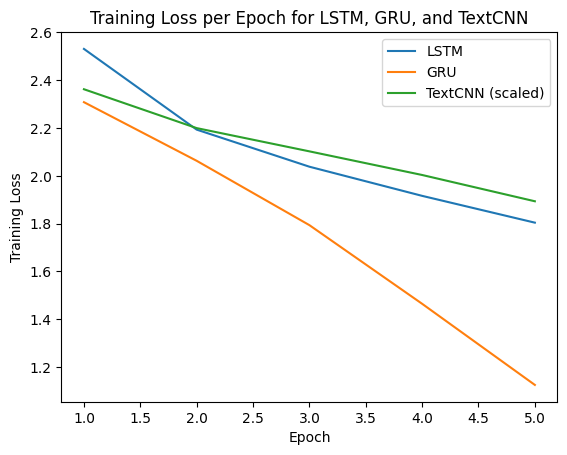

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import requests
from io import BytesIO
from PIL import Image

"""
Plots the training loss over 5 epochs for three models: LSTM, GRU, and TextCNN. 
Since TextCNN loss values are much larger, they are scaled down by 1000 to fit 
the same chart. The plot helps compare how quickly each model's loss decreases during
training, showing which model learns faster or better.
"""

# Loss values per epoch
lstm_loss = [2.5306, 2.1931, 2.0380, 1.9161, 1.8040]
gru_loss = [2.3079, 2.0627, 1.7936, 1.4647, 1.1254]
textcnn_loss = [2362.0029, 2199.4365, 2102.2039, 2003.3820, 1893.4542]

# Scale TextCNN losses down by 1000
textcnn_loss_scaled = [loss / 1000 for loss in textcnn_loss]

epochs = range(1, 6)

plt.plot(epochs, lstm_loss, label='LSTM')
plt.plot(epochs, gru_loss, label='GRU')
plt.plot(epochs, textcnn_loss_scaled, label='TextCNN (scaled)')

plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss per Epoch for LSTM, GRU, and TextCNN')
plt.legend()
plt.show()

/var/folders/lw/wl3j1cpx3l903_5dcyj2ps_00000gn/T/ipykernel_28618/506798780.py:34: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize(size, Image.ANTIALIAS)


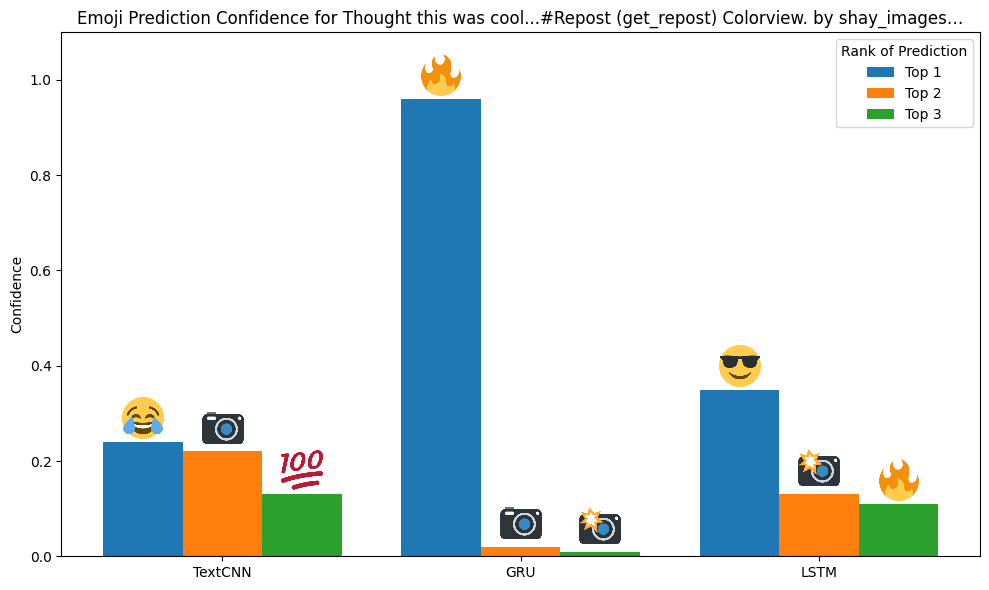

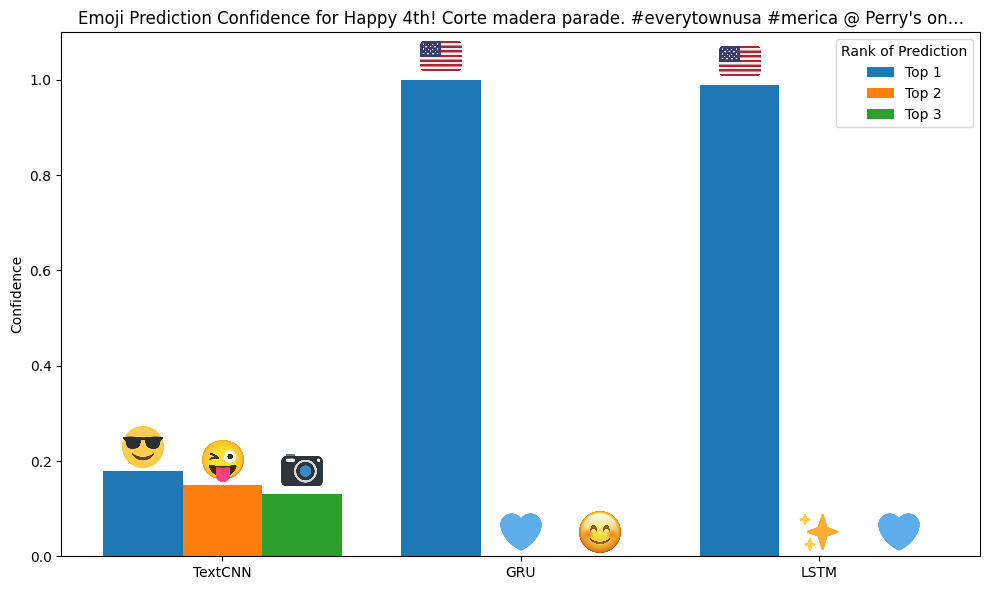

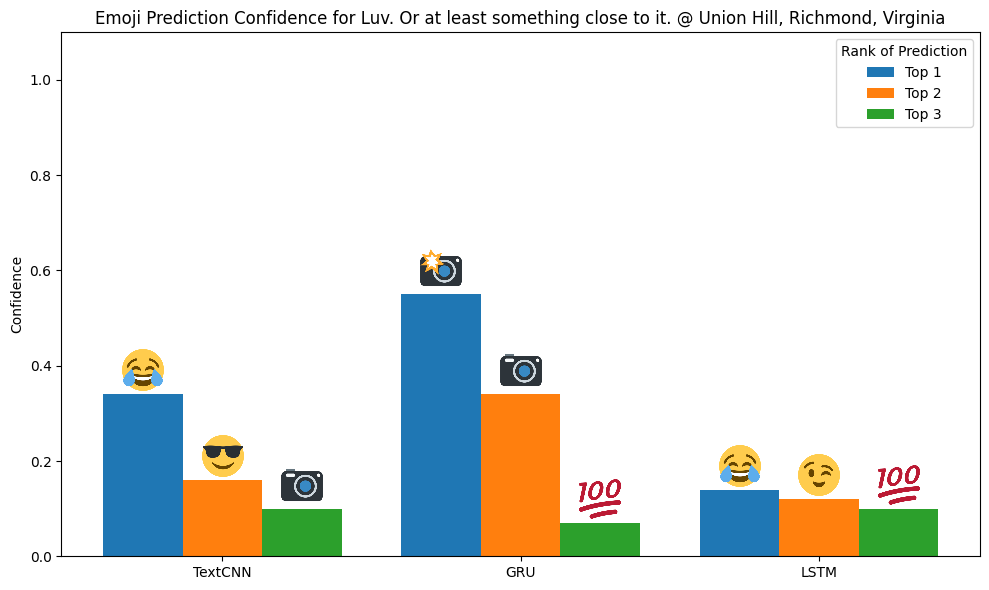

In [22]:
"""
Visualize the top 3 emoji predictions from three models (TextCNN, GRU, LSTM) for three example tweets.
It maps emoji characters to image URLs, fetches and resizes emoji images, then plots bar charts of 
confidence scores with the corresponding emoji images shown above each bar. This makes it easy to 
compare how confidently each model predicts different emojis for the same tweet.
"""

# Map emoji characters to their PNG image URLs
emoji_url_map = {
    '😂': 'https://em-content.zobj.net/thumbs/240/twitter/322/face-with-tears-of-joy_1f602.png',
    '📷': 'https://em-content.zobj.net/thumbs/240/twitter/322/camera_1f4f7.png',
    '💯': 'https://em-content.zobj.net/thumbs/240/twitter/322/hundred-points_1f4af.png',
    '🔥': 'https://em-content.zobj.net/thumbs/240/twitter/322/fire_1f525.png',
    '😎': 'https://em-content.zobj.net/thumbs/240/twitter/322/smiling-face-with-sunglasses_1f60e.png',
    '📸': 'https://em-content.zobj.net/thumbs/240/twitter/322/camera-with-flash_1f4f8.png',
    '🇺🇸': 'https://em-content.zobj.net/thumbs/240/twitter/322/flag-united-states_1f1fa-1f1f8.png',
    '😉': 'https://em-content.zobj.net/thumbs/240/twitter/322/winking-face_1f609.png',
    '😍': 'https://em-content.zobj.net/thumbs/240/twitter/322/smiling-face-with-heart-eyes_1f60d.png',
    '❤': 'https://em-content.zobj.net/thumbs/240/twitter/322/red-heart_2764-fe0f.png',
    '✨': 'https://em-content.zobj.net/thumbs/240/twitter/322/sparkles_2728.png',
    '💕': 'https://em-content.zobj.net/thumbs/240/twitter/322/two-hearts_1f495.png',
    '💙': 'https://em-content.zobj.net/thumbs/240/twitter/322/blue-heart_1f499.png',
    '😜': 'https://static-00.iconduck.com/assets.00/face-with-stuck-out-tongue-and-winking-eye-emoji-499x512-zp0nl3tn.png',
    '😊': 'https://emojiisland.com/cdn/shop/products/Smiling_Emoji_Icon_-_Blushed.png?v=1571606114'
}

def get_emoji_image(emoji_char, size=(300, 300)):
    # Get the image URL for the given emoji character from the mapping
    url = emoji_url_map.get(emoji_char)
    if not url:
        return None
    response = requests.get(url)
    # Open the image from the downloaded bytes and convert to RGBA format then resize
    img = Image.open(BytesIO(response.content)).convert("RGBA")
    img = img.resize(size, Image.ANTIALIAS)
    return np.array(img)

# Top 3 emoji predictions for 3 tweets from TextCNN, GRU, LSTM
tweets = [
    # Tweet 1 Thought this was cool...#Repost (get_repost)・・・Colorview. by shay_images…
    [
        [('😂', 0.24), ('📷', 0.22), ('💯', 0.13)],  # TextCNN
        [('🔥', 0.96), ('📷', 0.02), ('📸', 0.01)],  # GRU
        [('😎', 0.35), ('📸', 0.13), ('🔥', 0.11)],  # LSTM
    ],
    # Tweet 2 Happy 4th! Corte madera parade. #everytownusa #merica @ Perry's on…
    [
        [('😎', 0.18), ('😜', 0.15), ('📷', 0.13)], # TextCNN
        [('🇺🇸', 1.00), ('💙', 0.00), ('😊', 0.00)], # GRU
        [('🇺🇸', 0.99), ('✨', 0.00), ('💙', 0.00)], # LSTM
    ],
    # Tweet 3 Luv. Or at least something close to it. @ Union Hill, Richmond, Virginia
    [
        [('😂', 0.34), ('😎', 0.16), ('📷', 0.10)], # TextCNN
        [('📸', 0.55), ('📷', 0.34), ('💯', 0.07)], # GRU
        [('😂', 0.14), ('😉', 0.12), ('💯', 0.10)], # LSTM
    ],
]


models = ['TextCNN', 'GRU', 'LSTM']
num_tweets = len(tweets)
top_n = 3
text_tweets = ["Thought this was cool...#Repost (get_repost) Colorview. by shay_images…", "Happy 4th! Corte madera parade. #everytownusa #merica @ Perry's on…","Luv. Or at least something close to it. @ Union Hill, Richmond, Virginia"]

for tweet_idx in range(num_tweets):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    x = np.arange(len(models))
    total_width = 0.8
    bar_width = total_width / top_n
    
    for i in range(top_n):
        # Extract confidence scores for the i-th top emoji prediction from each model
        confidences = [tweets[tweet_idx][model_idx][i][1] for model_idx in range(len(models))]
        # Extract emoji characters for the i-th top prediction from each model
        emojis = [tweets[tweet_idx][model_idx][i][0] for model_idx in range(len(models))]

        # Plot bars at the calculated positions with the confidence values
        bar_positions = x - total_width/2 + i*bar_width + bar_width/2
        bars = ax.bar(bar_positions, confidences, width=bar_width, label=f'Top {i+1}')

        # Add the corresponding emoji image or emoji character above it
        for bar, emoji_char in zip(bars, emojis):
            height = bar.get_height()
            img = get_emoji_image(emoji_char)
            if img is not None:
                imagebox = OffsetImage(img, zoom=0.1)
                # Have the emoji image slightly above the top center of the bar
                ab = AnnotationBbox(imagebox, (bar.get_x() + bar.get_width()/2, height + 0.05), frameon=False)
                ax.add_artist(ab)
            else:
                ax.text(
                    bar.get_x() + bar.get_width()/2,
                    height + 0.02,
                    emoji_char,
                    ha='center',
                    va='bottom',
                    fontsize=20
                )
    
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.set_ylim(0, 1.1)
    ax.set_ylabel('Confidence')
    ax.set_title(f'Emoji Prediction Confidence for {text_tweets[tweet_idx]}')
    ax.legend(title='Rank of Prediction')
    plt.tight_layout()
    plt.show()

**Tweet 1: "Thought this was cool...#Repost (get_repost) Colorview. by shay_images…"**
For the first tweet, the GRU model shows very high confidence (0.96) in predicting the fire emoji (🔥), indicating it strongly associates this tweet with something exciting or “cool.” In contrast, TextCNN and LSTM have lower confidence scores overall, with TextCNN favoring the laughing face (😂) and camera (📷) emojis, possibly interpreting humor or image-related content. LSTM’s predictions align somewhat with GRU by including the fire emoji but rank it lower. Both GRU and LSTM also include camera-related emojis, hinting they detect photo references in the tweet, while TextCNN spreads confidence more evenly across its top predictions, showing less certainty.

**Tweet 2: "Happy 4th! Corte madera parade. #everytownusa #merica @ Perry's on…"**
In the second tweet, both GRU and LSTM models strongly agree by predicting the United States flag emoji (🇺🇸) with near-perfect confidence (1.00 and 0.99), fitting the patriotic theme of the Independence Day tweet perfectly. Meanwhile, TextCNN shows less certainty with lower confidence scores, favoring emojis like the smiling face with sunglasses (😎) and winking face with tongue out (😜), which seem less related to the tweet’s context. This indicates that GRU and LSTM better capture the specific theme and context here, while TextCNN’s predictions appear more casual and diffuse.

**Tweet 3: "Luv. Or at least something close to it. @ Union Hill, Richmond, Virginia"**
For the third tweet, GRU again shows the highest confidence with camera-related emojis (📸 at 0.55 and 📷 at 0.34), suggesting it detects references to photo sharing or location tagging. TextCNN prefers the laughing face (😂) and sunglasses emoji (😎) but with lower confidence, and LSTM also ranks 😂 first but with only modest confidence, showing more uncertainty. All models include the hundred points emoji (💯) among their top predictions but with low confidence. The ambiguous and informal nature of this tweet likely contributes to the varied and generally lower confidence predictions. Overall, GRU appears more decisive, especially in picking up image-related cues, compared to the other models.

# Conculsion
For this specific case, the GRU model appears to be the best choice overall. It consistently provides the highest confidence scores and captures the context of the tweets more accurately—such as confidently predicting the fire emoji for the “cool” tweet, and the U.S. flag emoji for the patriotic tweet. Its predictions are more decisive and contextually relevant compared to TextCNN and LSTM, which tend to be less confident or less aligned with the tweet themes. Therefore, GRU demonstrates stronger performance in emoji prediction for these short, informal tweets.